In [ ]:
import re
import time
import json
import numpy as np
import pandas as pd
import sys
import os
from inc_ms_fda import IncFDO
from prog_ms_fda import ProgressiveFDA
from skfda.exploratory.depth import IntegratedDepth
from skfda.exploratory.depth.multivariate import SimplicialDepth
from skfda.exploratory.visualization import MagnitudeShapePlot
import matplotlib.pyplot as plt
from skfda import FDataGrid
from matplotlib.lines import Line2D

In [55]:
def norm(df):
  df = (df - df.min()) / (df.max() - df.min())
  return df

In [ ]:
dir = "./filtered_test2.csv"
kol_sken1 = ['C1', 'C1E', 'C3', 'C8', 'C10', 'C6']

data = pd.read_csv(dir)
df = data  # failsafe
df_norm = df[kol_sken1].iloc[:]
#df_norm = norm(df_norm)
#df_norm = df[kol_sken1].iloc[1300:1400]

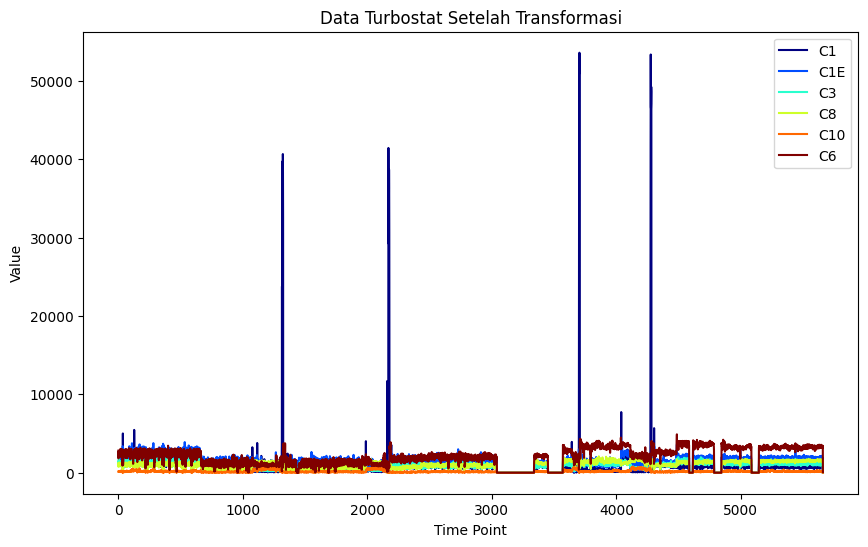

In [ ]:
colormap = plt.colormaps['jet']
num_points = len(kol_sken1)
colors_indices = np.linspace(0, 1, num_points)
line_colors = colormap(colors_indices)  

plt.figure(figsize=(10, 6))
for idx, col in enumerate(df_norm.columns):
    plt.plot(df_norm.index, df_norm[col], label=col, color=line_colors[idx])

plt.xlabel("Time Point")
plt.ylabel("Value")
plt.title("Data Turbostat Setelah Transformasi")
plt.legend()
plt.show()

c:\Users\armic\AppData\Local\Programs\Python\Python311\Lib\site-packages\skfda\exploratory\depth\multivariate.py:376: RuntimeWarning: divide by zero encountered in divide
  diff: NDArrayFloat = np.abs(X - self._location) / self._scale
c:\Users\armic\AppData\Local\Programs\Python\Python311\Lib\site-packages\skfda\exploratory\depth\multivariate.py:376: RuntimeWarning: invalid value encountered in divide
  diff: NDArrayFloat = np.abs(X - self._location) / self._scale
c:\Users\armic\AppData\Local\Programs\Python\Python311\Lib\site-packages\skfda\representation\grid.py:842: RuntimeWarning: divide by zero encountered in divide
  return self._copy_op(other, data_matrix=data_matrix / self.data_matrix)
c:\Users\armic\AppData\Local\Programs\Python\Python311\Lib\site-packages\skfda\exploratory\outliers\_directional_outlyingness.py:216: RuntimeWarning: invalid value encountered in subtract
  dir_outlyingness.data_matrix
c:\Users\armic\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy

NaN detected, retrying with SimplicialDepth...


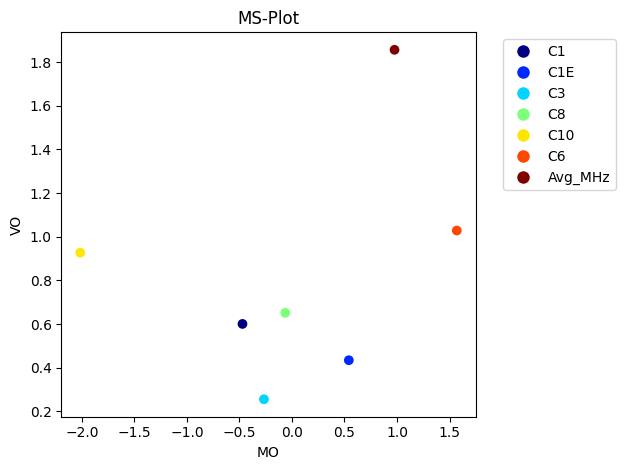

In [ ]:
core_data = df_norm.values.T

data_fda = FDataGrid(data_matrix=core_data)

# Function to create and plot MS-Plot
def create_msplot(data_fda, use_simplicial_depth=False):
    try:
        msplot = MagnitudeShapePlot(
            data_fda,
            multivariate_depth=SimplicialDepth() if use_simplicial_depth else None,
        )
        
        colormap = plt.colormaps['jet']
        num_points = len(kol_sken1)
        colors_indices = np.linspace(0, 1, num_points)
        scatter_colors = colormap(colors_indices)

        # Membuat plot scatter
        fig, ax = plt.subplots()
        ax.scatter(msplot.points[:, 0], msplot.points[:, 1], c=scatter_colors)
        ax.set_title("MS-Plot")
        ax.set_xlabel("MO")
        ax.set_ylabel("VO")

        handles = [
            Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter_colors[i],
                   markersize=10, label=label)
            for i, label in enumerate(kol_sken1)
        ]
        ax.legend(handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()
    
    except ValueError as e:
        if "Input X contains NaN" in str(e) and not use_simplicial_depth:
            print("NaN detected, retrying with SimplicialDepth...")
            create_msplot(data_fda, use_simplicial_depth=True)
        else:
            raise
create_msplot(data_fda)

C:\Users\armic\AppData\Local\Temp\ipykernel_20420\1630927315.py:24: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter([], [], c=scatter_colors[idx], label=label)  # Dummy scatter untuk legend


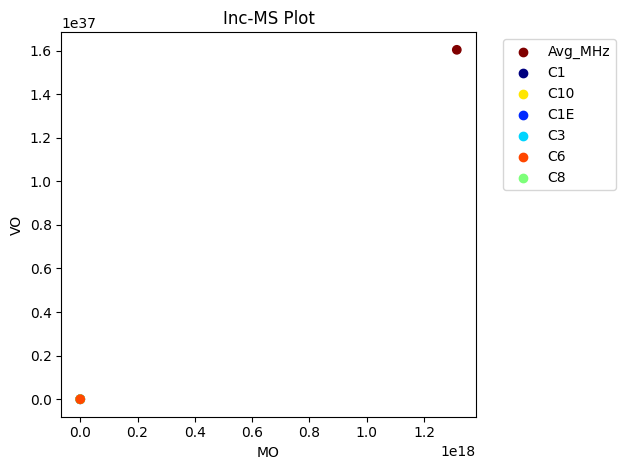

In [ ]:
cores = df_norm
X = cores.T.to_numpy()

colormap = plt.colormaps['jet']
num_points = len(kol_sken1)
colors_indices = np.linspace(0, 1, num_points)
scatter_colors = colormap(colors_indices)

inc_fdo = IncFDO()
inc_fdo.initial_fit(X)

plt.figure()
plt.scatter(inc_fdo.MO, inc_fdo.VO, c=scatter_colors)
plt.title('Inc-MS Plot')
plt.xlabel("MO")
plt.ylabel("VO")
label_names = df_norm.columns[0:]

unique_labels = np.unique(label_names)
for label in unique_labels:
    idx = np.where(label_names == label)[0][0]  
    plt.scatter([], [], c=scatter_colors[idx], label=label)  

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  
plt.tight_layout()  
plt.show()